In [4]:
# Install Required Libraries (Uncomment if needed)
# !pip install xgboost
# !pip install prophet

# Standard Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import plotly.graph_objects as go
# Geospatial Libraries
import geopandas as gpd

# Statistical and Scientific Libraries
from scipy import stats
from scipy.stats import zscore, boxcox
import scipy.cluster.hierarchy as sch  # For clustering dendrograms

# Machine Learning - Preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder
from sklearn.impute import SimpleImputer

# Enable experimental IterativeImputer before importing it
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning - Model Selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

# Machine Learning - Supervised Learning
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor

# Machine Learning - Unsupervised Learning
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

# Machine Learning - Time Series
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

# Machine Learning - Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, classification_report,  # Classification
    mean_absolute_error, mean_squared_error, r2_score  # Regression
)

# Natural Language Processing (NLP)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure NLTK resources are downloaded
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bcoeur34/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/bcoeur34/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bcoeur34/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data Pre-processing / Explore a DataFrame

In [6]:
# Load the NBA 2024 dataset from a local CSV file into a pandas DataFrame
df = pd.read_csv("/Users/bcoeur34/Desktop/Python /nba_2024.csv")
# Display the first five rows of the DataFrame to preview the data
df.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Player-additional
0,1,Joel Embiid,29,PHI,C,39,39,33.6,11.5,21.8,...,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7,AS,embiijo01
1,2,Luka Dončić,24,DAL,PG,70,70,37.5,11.5,23.6,...,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9,MVP-3CPOY-6ASNBA1,doncilu01
2,3,Giannis Antetokounmpo,29,MIL,PF,73,73,35.2,11.5,18.8,...,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4,MVP-4DPOY-9CPOY-12ASNBA1,antetgi01
3,4,Shai Gilgeous-Alexander,25,OKC,PG,75,75,34.0,10.6,19.8,...,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1,MVP-2DPOY-7CPOY-3ASNBA1,gilgesh01
4,5,Jalen Brunson,27,NYK,PG,77,77,35.4,10.3,21.4,...,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7,MVP-5CPOY-5ASNBA2,brunsja01


In [7]:
# Print summary of the DataFrame
# This displays information about the DataFrame including:
# - Total number of rows and columns
# - Column names and their data types
# - Non-null value counts for each column
# - Memory usage of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rk                 572 non-null    int64  
 1   Player             572 non-null    object 
 2   Age                572 non-null    int64  
 3   Team               572 non-null    object 
 4   Pos                572 non-null    object 
 5   G                  572 non-null    int64  
 6   GS                 572 non-null    int64  
 7   MP                 572 non-null    float64
 8   FG                 572 non-null    float64
 9   FGA                572 non-null    float64
 10  FG%                568 non-null    float64
 11  3P                 572 non-null    float64
 12  3PA                572 non-null    float64
 13  3P%                540 non-null    float64
 14  2P                 572 non-null    float64
 15  2PA                572 non-null    float64
 16  2P%                567 non

In [8]:
# Print a summary of descriptive statistics for the dataframe
# This includes count, mean, std, min, 25%, 50%, 75%, max for numeric columns
df.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.00000,572.000000,568.000000,572.000000,572.000000,...,537.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,286.500000,25.743007,46.153846,21.503497,18.650699,3.12028,6.683392,0.452750,0.940909,2.646329,...,0.747110,0.857692,2.522902,3.373077,2.001399,0.591259,0.402797,0.984615,1.490909,8.423252
std,165.266452,4.225107,25.535953,26.906890,9.906921,2.45884,4.991255,0.107259,0.879363,2.241818,...,0.157051,0.746194,1.831697,2.425364,1.873410,0.390106,0.413213,0.795813,0.787215,6.791411
min,1.000000,19.000000,1.000000,0.000000,0.500000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,143.750000,23.000000,22.000000,0.000000,10.800000,1.30000,3.000000,0.409750,0.200000,0.900000,...,0.686000,0.300000,1.200000,1.600000,0.700000,0.300000,0.100000,0.400000,1.000000,3.400000
50%,286.500000,25.000000,51.000000,7.000000,17.350000,2.40000,5.100000,0.452500,0.700000,2.100000,...,0.772000,0.700000,2.200000,3.000000,1.300000,0.550000,0.300000,0.700000,1.500000,6.400000
75%,429.250000,28.000000,69.000000,41.250000,27.000000,4.50000,9.100000,0.500000,1.500000,3.825000,...,0.833000,1.100000,3.400000,4.400000,2.725000,0.825000,0.600000,1.400000,2.100000,11.700000
max,572.000000,39.000000,84.000000,82.000000,37.800000,11.50000,23.600000,0.747000,4.800000,11.800000,...,1.000000,4.600000,10.100000,13.700000,10.900000,2.100000,3.600000,4.400000,3.600000,34.700000


In [9]:
# Check for the number of null values in each column
# .isnull() creates a boolean mask where True indicates null values
# .sum() counts the number of True values (nulls) in each column
# .head() shows only the first few results
df.isnull().sum().head()

Rk        0
Player    0
Age       0
Team      0
Pos       0
dtype: int64

In [10]:
# Count the number of duplicate rows in the dataframe
# Returns the sum of True values (where rows are duplicates)
df.duplicated().sum()

0

In [11]:
# Fill all null values in the dataframe with 0
# The inplace=True parameter modifies the original dataframe instead of returning a new one
df.fillna(0, inplace=True)

In [12]:
# Convert the Age column from float to integer type
# This ensures age values are whole numbers without decimal points
df["Age"] = df["Age"].astype(int)

In [13]:
# Rename the DataFrame columns to more descriptive names
# This improves readability and makes the data more self-explanatory
# The dictionary maps original column names to new, more descriptive names
# inplace=True means the DataFrame is modified directly without creating a copy
# df.rename(columns={
    'PName': 'Player_Name',                      # Player's full name
    'POS': 'Position',                           # Player's position on the team
    'Team': 'Team_Abbreviation',                 # NBA team abbreviation
    'Age': 'Age',                                # Player's age
    'GP': 'Games_Played',                        # Number of games played
    'W': 'Wins',                                 # Number of wins
    'L': 'Losses',                               # Number of losses
    'Min': 'Minutes_Played',                     # Total minutes played
    'PTS': 'Total_Points',                       # Total points scored
    'FGM': 'Field_Goals_Made',                   # Field goals made
    'FGA': 'Field_Goals_Attempted',              # Field goals attempted
    'FG%': 'Field_Goal_Percentage',              # Field goal percentage
    '3PM': 'Three_Point_FG_Made',                # Three-point field goals made
    '3PA': 'Three_Point_FG_Attempted',           # Three-point field goals attempted
    '3P%': 'Three_Point_FG_Percentage',          # Three-point field goal percentage
    'FTM': 'Free_Throws_Made',                   # Free throws made
    'FTA': 'Free_Throws_Attempted',              # Free throws attempted
    'FT%': 'Free_Throw_Percentage',              # Free throw percentage
    'OREB': 'Offensive_Rebounds',                # Offensive rebounds
    'DREB': 'Defensive_Rebounds',                # Defensive rebounds
    'REB': 'Total_Rebounds',                     # Total rebounds (OREB + DREB)
    'AST': 'Assists',                            # Assists
    'TOV': 'Turnovers',                          # Turnovers
    'STL': 'Steals',                             # Steals
    'BLK': 'Blocks',                             # Blocks
    'PF': 'Personal_Fouls',                      # Personal fouls
    'FP': 'NBA_Fantasy_Points',                  # NBA fantasy points
    'DD2': 'Double_Doubles',                     # Double-doubles achieved
    'TD3': 'Triple_Doubles',                     # Triple-doubles achieved
    '+/-': 'Plus_Minus'                          # Plus-minus statistic
}, inplace=True)

IndentationError: unexpected indent (1082843726.py, line 6)

In [ ]:
# Create a histogram using Plotly Express to visualize the distribution of player positions
# - df: The dataframe containing player data
# - x='Pos': Plot the 'Pos' (Position) column on the x-axis
# - color_discrete_sequence: Use the Vivid color palette for better visualization
# - title: Set the chart title to 'Players position value counts'
# - template: Use the dark theme for the plot background and styling
import plotly.express as px
px.histogram(df, x='Pos', color_discrete_sequence=px.colors.qualitative.Vivid,
            title='Players position value counts',template='plotly_dark')

In [ ]:
# Group data by position and calculate the mean points per game
# This creates a new DataFrame that shows the average points scored by players in each position
# First, we group the data by the 'Pos' (position) column
# Then we calculate the mean of 'PTS' (points) for each position group
# reset_index() converts the grouped result back to a regular DataFrame with 'Pos' as a column
position_stats = df.groupby(['Pos']).agg({'PTS': 'mean'}).reset_index()
position_stats

In [ ]:
# Create a bar chart showing average points per game for each position
fig = px.bar(position_stats, x='Pos', y='PTS', 
             color='PTS',  # Color based on average PTS
             color_continuous_scale='Bluered',  # Beautiful color scale from blue to red
             title='Average Points Per Game by Position',  # Chart title
             labels={'Pos': 'Player Position', 'PTS': 'Avg Points Per Game'},  # Axis labels
             template='plotly_dark')  # Dark theme for better visualization

# Display the interactive plotly chart in the notebook
# This renders the chart and allows for interactive features like hover tooltips
fig.show()

In [ ]:
# Sort the dataframe by Total Rebounds (TRB) in descending order
# Select only the 'Player' and 'TRB' columns
# Display the top 5 players with the most rebounds
print(df.sort_values(by='TRB', ascending=False)[['Player', 'TRB']].head())

In [ ]:
# Calculate Defensive Performance by summing blocks and steals
df['Defensive_Performance'] = df['BLK'] + df['STL']

# Get the top 10 players with the highest defensive performance
best_defending_players = df.sort_values(by='Defensive_Performance', ascending=False).head(10)

# Define a color list for each bar to make the visualization more distinguishable
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'cyan', 'pink', 'lime', 'magenta']

# Create a bar chart using Plotly
fig_defending = go.Figure()

# Add the bar trace with player names on x-axis and defensive performance on y-axis
fig_defending.add_trace(go.Bar(
    x=best_defending_players['Player'], 
    y=best_defending_players['Defensive_Performance'], 
    marker=dict(color=colors)))  # Apply the colors to the bars

# Configure the layout of the chart with title, axis labels and dimensions
fig_defending.update_layout(
    title='Top 10 Best Defending Players',
    xaxis_title='Player Name',
    yaxis_title='Defensive Performance (Combined Blocks and Steals)',
    height=500,
    width=1000,
    template='plotly_dark'  # Use dark theme for better visualization
)

In [ ]:
# Group the dataframe by position ('Pos'), calculate the mean points ('PTS') for each position
# Reset the index to make 'Pos' a column instead of an index
# Sort the results in descending order based on average points
avg_pts_by_pos = df.groupby('Pos')['PTS'].mean().reset_index().sort_values(by='PTS', ascending=False)
# Display the top rows of the resulting dataframe
avg_pts_by_pos.head()

In [14]:
# Group data by team, sum the points for each team, convert to DataFrame
# Then sort teams by total points in descending order
# Display the top 5 teams with highest total points
total_pts_by_team = df.groupby('Team')['PTS'].sum().reset_index().sort_values(by='PTS', ascending=False)
total_pts_by_team.head()

,Team,PTS
0,2TM,513.5
16,MEM,217.5
26,POR,169.1
2,ATL,167.5
5,CHI,161.3


In [15]:
# Calculate scoring efficiency for each player by dividing points by field goal attempts
df['Scoring_Efficiency'] = df['PTS'] / df['FGA']

# Find the player with the highest scoring efficiency
# idxmax() returns the index of the maximum value in the Scoring_Efficiency column
highest_eff = df.loc[df['Scoring_Efficiency'].idxmax()]

# Print the player's name, points, field goal attempts, and scoring efficiency
print(highest_eff[['Player', 'PTS', 'FGA', 'Scoring_Efficiency']])

Player                Quenton Jackson
PTS                               0.7
FGA                               0.3
Scoring_Efficiency           2.333333
Name: 552, dtype: object


In [16]:
# Which team has the best average assist-to-turnover ratio (AST/TO)?
# Calculate the assist-to-turnover ratio for each row, adding a small epsilon (1e-5) to avoid division by zero
df['AST_TO_Ratio'] = df['AST'] / (df['TOV'] + 1e-5)  
# Group data by team, calculate the mean AST_TO_Ratio for each team, convert to DataFrame, and sort in descending order
team_ast_to = df.groupby('Team')['AST_TO_Ratio'].mean().reset_index().sort_values(by='AST_TO_Ratio', ascending=False)
# Display the top teams with the best assist-to-turnover ratios
team_ast_to.head()

,Team,AST_TO_Ratio
29,TOR,17649.184131
22,OKC,13335.311827
24,PHI,10001.880022
4,BRK,10001.680836
13,IND,6251.840948


In [17]:
# Analyzing correlation between key basketball statistics
# Define the columns we want to analyze: Points, Rebounds, Assists, and Minutes Played
cols = ['PTS', 'TRB', 'AST', 'MP']

# Calculate the correlation matrix between these statistics
# This shows how strongly each pair of variables is related
correlation_matrix = df[cols].corr()

# Display the correlation matrix
# Values close to 1 indicate strong positive correlation
# Values close to -1 indicate strong negative correlation
# Values close to 0 indicate little to no correlation
print(correlation_matrix)

          PTS       TRB       AST        MP
PTS  1.000000  0.664955  0.781182  0.892276
TRB  0.664955  1.000000  0.451020  0.718441
AST  0.781182  0.451020  1.000000  0.748452
MP   0.892276  0.718441  0.748452  1.000000


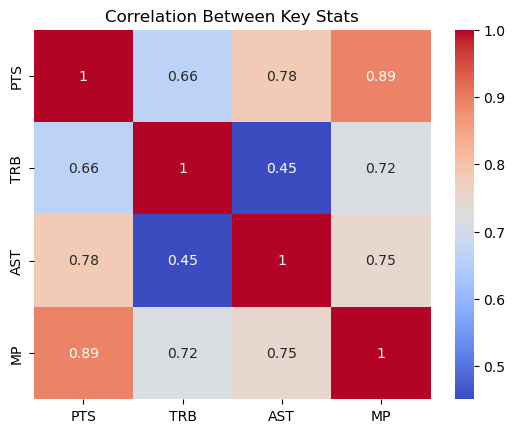

In [18]:
# Create a heatmap visualization of the correlation matrix
# - annot=True displays the correlation values in each cell
# - cmap='coolwarm' sets the color scheme (blue for negative, red for positive correlations)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# Add a descriptive title to the heatmap
plt.title("Correlation Between Key Stats")
# Display the heatmap
plt.show()

In [19]:
# Calculate defensive contribution by adding blocks and steals
df['DEF'] = df['BLK'] + df['STL']

# Group data by position, calculate mean defensive stats, and sort in descending order
defense_by_pos = df.groupby('Pos')['DEF'].mean().reset_index().sort_values(by='DEF', ascending=False)

# Display the top positions with highest defensive stats
defense_by_pos.head()

,Pos,DEF
0,C,1.335789
1,PF,1.053509
2,PG,0.954286
3,SF,0.896748
4,SG,0.822963


In [20]:
# Who are the most all-around players (high across many stats)?
# Create a combined score by summing key statistical categories

# Calculate an All_Around_Score by adding points, rebounds, assists, steals and blocks
df['All_Around_Score'] = df[['PTS', 'TRB', 'AST', 'STL', 'BLK']].sum(axis=1)

# Sort players by their All_Around_Score in descending order and select only relevant columns
all_around_players = df.sort_values(by='All_Around_Score', ascending=False)[['Player', 'All_Around_Score']]

# Display the top 10 most all-around players
all_around_players.head(10)

,Player,All_Around_Score
1,Luka Dončić,54.8
0,Joel Embiid,54.2
2,Giannis Antetokounmpo,50.7
11,Nikola Jokić,50.1
3,Shai Gilgeous-Alexander,44.7
18,Anthony Davis,44.3
14,LeBron James,43.1
57,Domantas Sabonis,42.8
7,Jayson Tatum,41.5
6,Kevin Durant,40.8


In [21]:
# Filter the dataframe to only include rows where the "Player" column equals "LeBron James"
# This creates a new dataframe containing only LeBron James' statistics
lebron_stats = df[df["Player"] == "LeBron James"]
# Display the filtered dataframe with LeBron's stats
lebron_stats

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,BLK,TOV,PF,PTS,Awards,Player-additional,Scoring_Efficiency,AST_TO_Ratio,DEF,All_Around_Score
14,15,LeBron James,39,LAL,PF,71,71,35.3,9.6,17.9,...,0.5,3.5,1.1,25.7,CPOY-10ASNBA3,jamesle01,1.435754,2.371422,1.8,43.1


In [22]:
# Example efficiency calculation (SIMPLIFIED)
# Calculate player efficiency by adding positive stats (points, rebounds, assists, steals, blocks)
# and subtracting negative stats (missed field goals and missed free throws)
df["Efficiency"] = (
    (df["PTS"] + df["TRB"] + df["AST"] + df["STL"] + df["BLK"]) -  # Sum of positive contributions
    (df["FGA"] - df["FG"]) -  # Missed field goals (attempts minus makes)
    (df["FTA"] - df["FT"])    # Missed free throws (attempts minus makes)
)
# Show LeBron's efficiency rating
# Filter the dataframe for LeBron James and extract his efficiency value
lebron_eff = df[df["Player"] == "LeBron James"]["Efficiency"]
print(f"Lebron's Efficiency Rating: {lebron_eff.values[0]}")  # Print the first value from the filtered series

Lebron's Efficiency Rating: 33.4


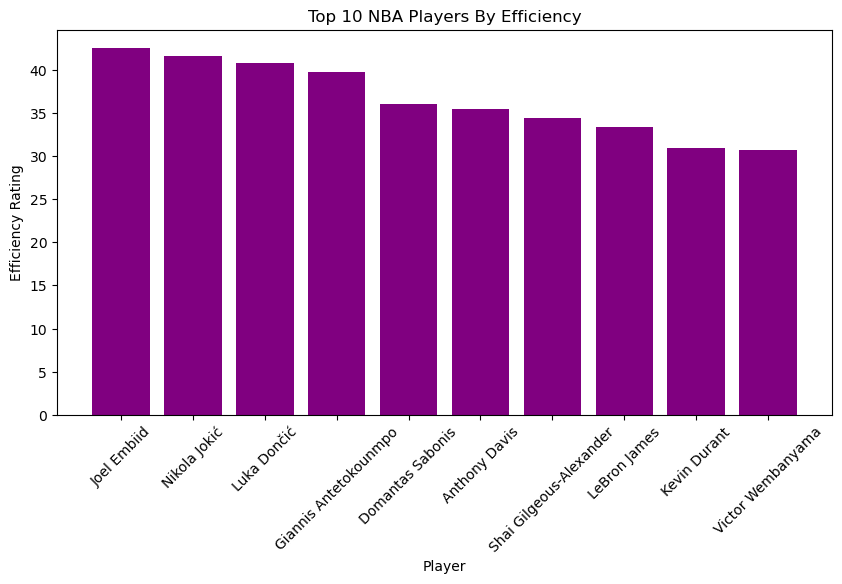

In [23]:
# Select top 10 NBA players based on efficiency rating
top_players = df.nlargest(10, "Efficiency")
# Create a bar chart with specified dimensions
plt.figure(figsize=(10, 5))
# Plot bars with player names on x-axis and efficiency values on y-axis
plt.bar(top_players["Player"], top_players["Efficiency"], color="purple")
# Add x-axis label
plt.xlabel("Player")
# Add y-axis label
plt.ylabel("Efficiency Rating")
# Add chart title
plt.title("Top 10 NBA Players By Efficiency")
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Display the chart
plt.show()

#  Data Visualization

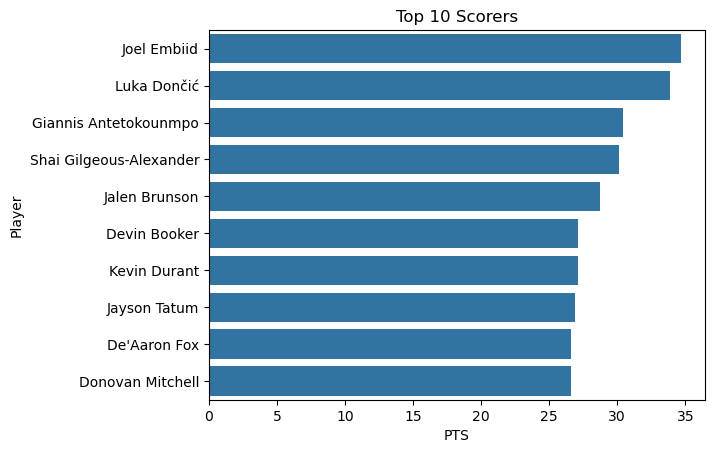

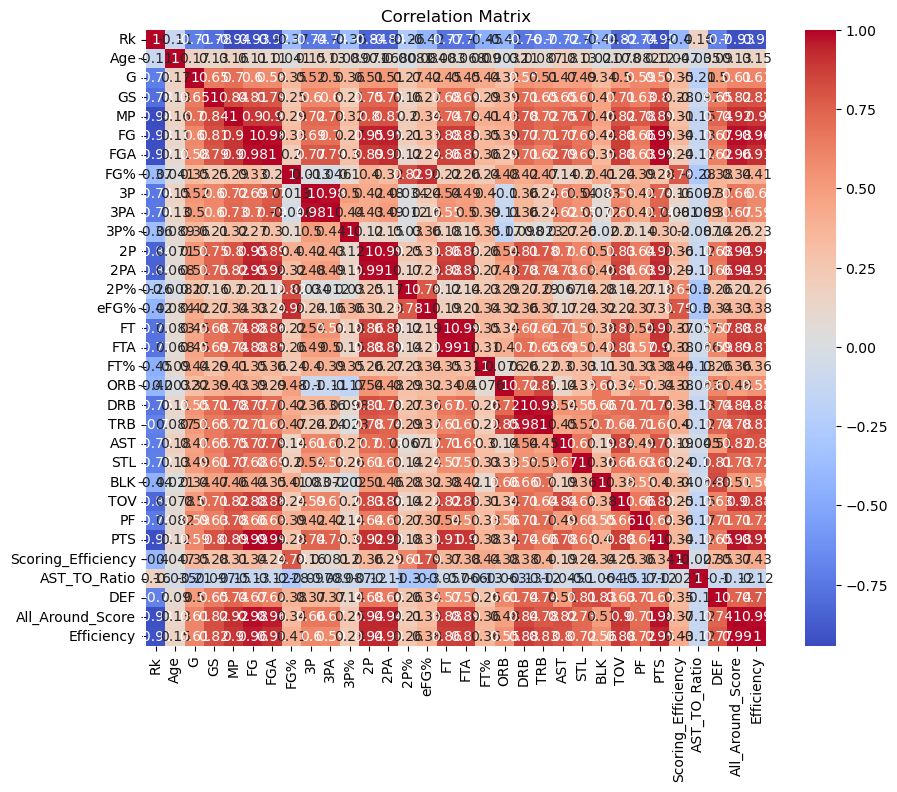

In [25]:
# Top 10 scorers
top_scorers = df.sort_values("PTS", ascending=False).head(10)  # Sort dataframe by points in descending order and get top 10 players
sns.barplot(x="PTS", y="Player", data=top_scorers)  # Create a horizontal bar plot showing points for each player
plt.title("Top 10 Scorers")  # Add title to the plot
plt.show()  # Display the plot

# Correlation heatmap
plt.figure(figsize=(10, 8))  # Create a new figure with specified size
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')  # Create heatmap of correlation matrix with values shown and using coolwarm color palette
plt.title("Correlation Matrix")  # Add title to the heatmap
plt.show()  # Display the heatmap

# Supervised Learning (Classification)

In [27]:
# Can we predict if a player scores more than 20 PPG?
from sklearn.model_selection import train_test_split  # Import function to split data into training and testing sets
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest classifier algorithm
from sklearn.metrics import classification_report  # Import tool to evaluate classification performance

# Create binary target variable: 1 if player scores >= 20 points per game, 0 otherwise
df['HighScorer'] = (df['PTS'] >= 20).astype(int)

# Select relevant features that might help predict high scorers
features = ["AST", "TRB", "FG%", "3P%", "FT%", "MP"]  # Assists, Rebounds, Field Goal %, 3-Point %, Free Throw %, Minutes Played
X = df[features]  # Feature matrix
y = df['HighScorer']  # Target vector

# Split data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest classifier with default parameters
clf = RandomForestClassifier()
clf.fit(X_train, y_train)  # Train the model on training data

# Make predictions on test data and evaluate performance
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))  # Print precision, recall, f1-score and support metrics

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       158
           1       0.56      0.64      0.60        14

    accuracy                           0.93       172
   macro avg       0.77      0.80      0.78       172
weighted avg       0.93      0.93      0.93       172



# Unsupervised Learning (Clustering)


Object `metrics` not found.


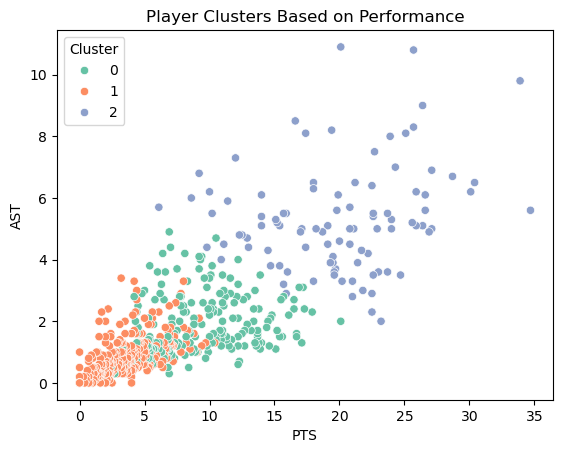

In [29]:
 Can we group players into performance metrics?
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select relevant performance metrics for clustering analysis
# PTS = Points, AST = Assists, TRB = Total Rebounds, STL = Steals, BLK = Blocks, TOV = Turnovers
X_cluster = df[["PTS", "AST", "TRB", "STL", "BLK", "TOV"]]

# Scale the data to have mean=0 and variance=1
# This is important because KMeans is sensitive to the scale of the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Apply KMeans clustering algorithm with 3 clusters
# random_state ensures reproducibility of results
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)  # Assign cluster labels to each player

# Create a scatter plot to visualize the clusters
# Using points and assists as dimensions, with color indicating cluster membership
sns.scatterplot(data=df, x="PTS", y="AST", hue="Cluster", palette="Set2")
plt.title("Player Clusters Based on Performance")
plt.show()

# Model Selection and Evaluation

In [31]:
# Compare classifiers for high scorer prediction:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Dictionary of classifier models to evaluate
models = {
    "RandomForest": RandomForestClassifier(),  # Random Forest classifier (imported earlier)
    "LogisticRegression": LogisticRegression(max_iter=1000),  # Logistic Regression with increased iterations
    "SVM": SVC(),  # Support Vector Machine with default parameters
    "GradientBoosting": GradientBoostingClassifier()  # Gradient Boosting classifier
}

# Evaluate each model using 5-fold cross-validation
for name, model in models.items():
    # Calculate accuracy scores across 5 folds
    score = cross_val_score(model, X, y, cv=5, scoring="accuracy")
    # Print the mean accuracy for each model
    print(f"{name} Mean Accuracy: {score.mean():.2f}")

RandomForest Mean Accuracy: 0.89
LogisticRegression Mean Accuracy: 0.90
SVM Mean Accuracy: 0.89
GradientBoosting Mean Accuracy: 0.88


# Technique to Handle It: PCA (Principal Component Analysis)
PCA reduces dimensionality by converting correlated features into uncorrelated principal components.

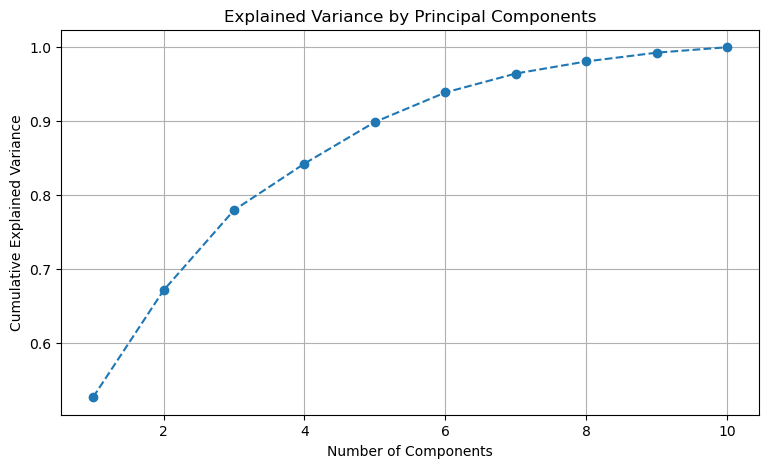

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Select relevant numeric features for player performance analysis
# These features represent key basketball statistics like points, assists, rebounds, etc.
features = ["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%", "MP"]
X = df[features].fillna(0)  # Fill missing values with zeros to handle incomplete data

# Step 2: Standardize the data
# This ensures all features contribute equally to the analysis regardless of their scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply Principal Component Analysis
# PCA reduces dimensionality while preserving as much variance as possible
# Using all features as components initially to analyze their importance
pca = PCA(n_components=len(features))
X_pca = pca.fit_transform(X_scaled)

# Step 4: Calculate cumulative explained variance
# This shows how much information is retained with each additional component
explained_var = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance to visualize component importance
# This helps determine how many components to keep for further analysis
plt.figure(figsize=(9, 5))
plt.plot(range(1, len(features)+1), explained_var, marker='o', linestyle='--')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

What is a Random Forest?

A Random Forest is:

An ensemble of Decision Trees
It uses bagging (Bootstrap Aggregation) to train multiple trees on different subsets of data
Each tree votes, and the majority vote wins (for classification)
Handles overfitting better than a single decision tree

In [35]:
# Predict if a player is a "High Scorer" (PTS >= 20)

from sklearn.model_selection import train_test_split  # Import function to split data into training and testing sets
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest classifier algorithm
from sklearn.metrics import classification_report, accuracy_score  # Import evaluation metrics

# Create a target column: HighScorer (1 if PTS >= 20)
# This creates a binary classification target - players who score 20+ points are labeled as 1
df['HighScorer'] = (df['PTS'] >= 20).astype(int)

# Choose numerical features (you can customize)
# These statistics will be used to predict if a player is a high scorer
features = ['AST', 'TRB', 'STL', 'BLK', 'TOV', 'MP', 'FG%', '3P%', 'FT%']
df = df.dropna(subset=features)  # Remove any rows with missing values in our selected features
X = df[features]  # Feature matrix
y = df['HighScorer']  # Target vector

# Split into training/testing sets
# 70% of data used for training, 30% for testing, with fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest
# Create a Random Forest classifier with 100 decision trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Train the model on our training data

# Predict
# Use the trained model to predict high scorers in the test set
y_pred = rf.predict(X_test)

# Evaluation
# Calculate and display the accuracy of our predictions
print("Accuracy:", accuracy_score(y_test, y_pred))
# Display detailed classification metrics (precision, recall, f1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9476744186046512

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       158
           1       0.67      0.71      0.69        14

    accuracy                           0.95       172
   macro avg       0.82      0.84      0.83       172
weighted avg       0.95      0.95      0.95       172



#  Feature Importance

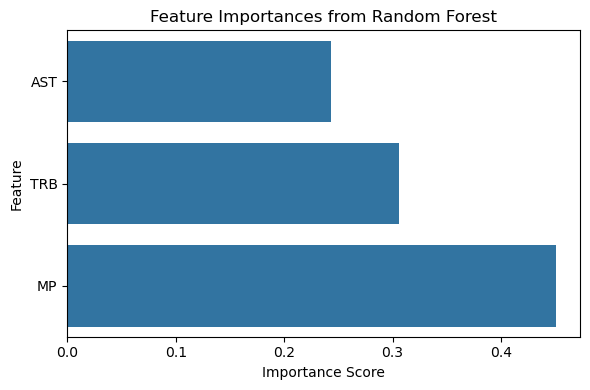

In [37]:
# Calculate feature importances from the trained Random Forest model
data = df[['PTS', 'AST', 'TRB', 'MP']].dropna()

# Create binary target - players are classified as high scorers if their points are above the median
data['HighScorer'] = (data['PTS'] > data['PTS'].median()).astype(int)

# Define features (assists, rebounds, minutes played) and target variable (high scorer classification)
X = data[['AST', 'TRB', 'MP']]
y = data['HighScorer']

# Standardize features to have mean=0 and variance=1 for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training (80%) and testing (20%) sets with fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier with fixed random state
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Extract feature importance scores from the trained model
importances = rf.feature_importances_
feature_names = X.columns

# Visualize feature importances using a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

What is a Decision Tree?

A Decision Tree:

Is a flowchart-like structure
Splits the data based on feature thresholds
Is interpretable, fast, and good for both classification and regression

In [39]:
# Use Case: Classify Players as "High Scorer" (PTS ≥ 20)

from sklearn.model_selection import train_test_split  # Import function to split data into training and testing sets
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Import decision tree classifier and visualization tool
from sklearn.metrics import classification_report, accuracy_score  # Import evaluation metrics

# Create binary target variable: 1 if player scores 20+ points, 0 otherwise
df['HighScorer'] = (df['PTS'] >= 20).astype(int)

# Select features that might predict scoring ability
features = ['AST', 'TRB', 'STL', 'BLK', 'TOV', 'MP', 'FG%', '3P%', 'FT%']
df = df.dropna(subset=features)  # Remove rows with missing values in any feature
X = df[features]  # Feature matrix
y = df['HighScorer']  # Target vector

# Split data: 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create decision tree with limited depth to prevent overfitting
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)  # Train the model on training data

# Make predictions on test data
y_pred = tree.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))  # Percentage of correct predictions
print("\nClassification Report:\n", classification_report(y_test, y_pred))  # Detailed metrics by class


Accuracy: 0.9127906976744186

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       158
           1       0.48      0.71      0.57        14

    accuracy                           0.91       172
   macro avg       0.72      0.82      0.76       172
weighted avg       0.93      0.91      0.92       172



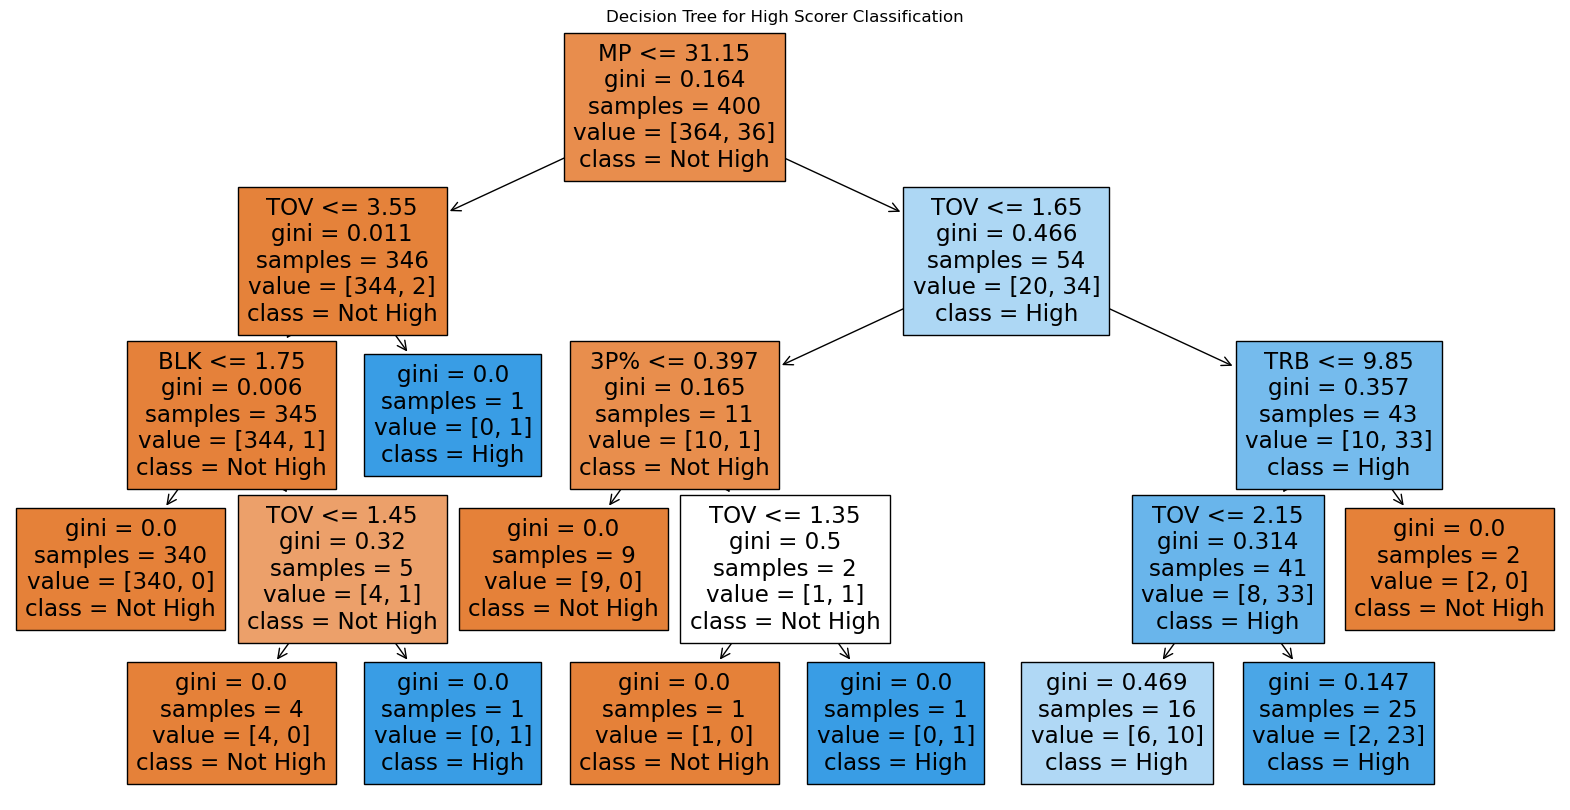

In [40]:
# Visualizing the Decision Tree model
# Create a figure with specified dimensions (width=20, height=10 inches)
plt.figure(figsize=(20, 10))

# Plot the decision tree with feature names and class labels
# - feature_names: Uses the features list to label the decision nodes
# - class_names: Labels the leaf nodes as "Not High" or "High"
# - filled=True: Colors the nodes based on the majority class
plot_tree(tree, feature_names=features, class_names=["Not High", "High"], filled=True)

# Add a descriptive title to the visualization
plt.title("Decision Tree for High Scorer Classification")

# Display the plot
plt.show()

In [41]:
df = pd.read_csv("/Users/bcoeur34/Desktop/Python /games.csv")
df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [42]:
## Find overall wins and winning percentages
print(df['HOME_TEAM_WINS'].value_counts())
print(df['HOME_TEAM_WINS'].value_counts(normalize = True))

HOME_TEAM_WINS
1    15645
0    11006
Name: count, dtype: int64
HOME_TEAM_WINS
1    0.587032
0    0.412968
Name: proportion, dtype: float64


In [43]:
home_wins = df['HOME_TEAM_WINS'].value_counts()
total_games = len(df)

win_pct = (home_wins[1] / total_games) * 100
loss_pct = (home_wins[0] / total_games) * 100

print(f"Home teams win {win_pct:.2f}% of games and lose {loss_pct:.2f}%.")

Home teams win 58.70% of games and lose 41.30%.


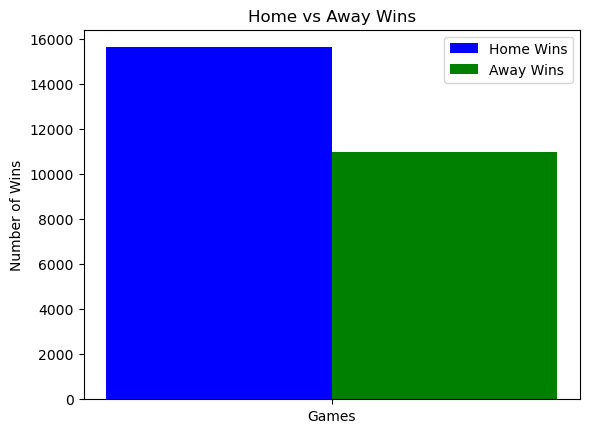

In [44]:
# Count wins
x = df['HOME_TEAM_WINS'].value_counts()
y = df['HOME_TEAM_WINS'].value_counts()

# Bar positions
labels = ['Games']
positions = np.arange(len(labels))

# Plot bars
plt.bar(positions, x[1], width=0.4, color='blue', label='Home Wins')
plt.bar(positions + 0.4, y[0], width=0.4, color='green', label='Away Wins')

# Add labels and title
plt.ylabel('Number of Wins')
plt.title('Home vs Away Wins')
plt.xticks(positions + 0.2, labels)
plt.legend()

# Show plot
plt.show()

In [45]:
# Encode 'win' as 1 if home team scored more, else 0
df["win"] = (df["PTS_home"] > df["PTS_away"]).astype(int)

# Select only necessary columns and drop rows with any missing values
features = ["FG_PCT_home", "FG_PCT_away", "REB_home", "AST_home", "win"]
df = df[features].dropna()

# Split features and target
x = df[["FG_PCT_home", "FG_PCT_away", "REB_home", "AST_home"]]
y = df["win"]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Prediction Accuracy: {accuracy:.2f}")

Prediction Accuracy: 0.79


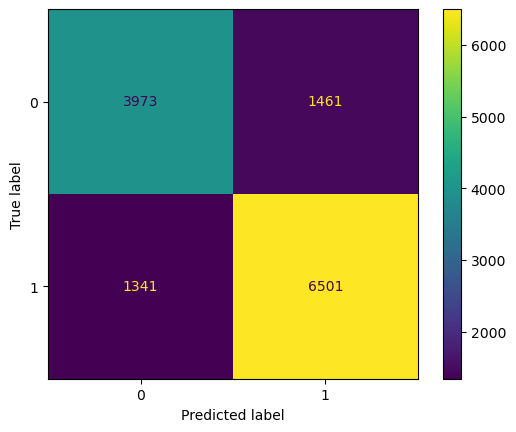

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [47]:
# Example of matches up 
new_game = pd.DataFrame([{"FG_PCT_home":0.28, 
                           "FG_PCT_away":0.45,
                           "REB_home":44,
                           "AST_home":25}])
prediction = model.predict(new_game)
print("predicted win" if prediction[0] == 1 else "predicted loss")

predicted loss


Mean Squared Error: 9.220250694400955
R² Score: 0.8233828431624677


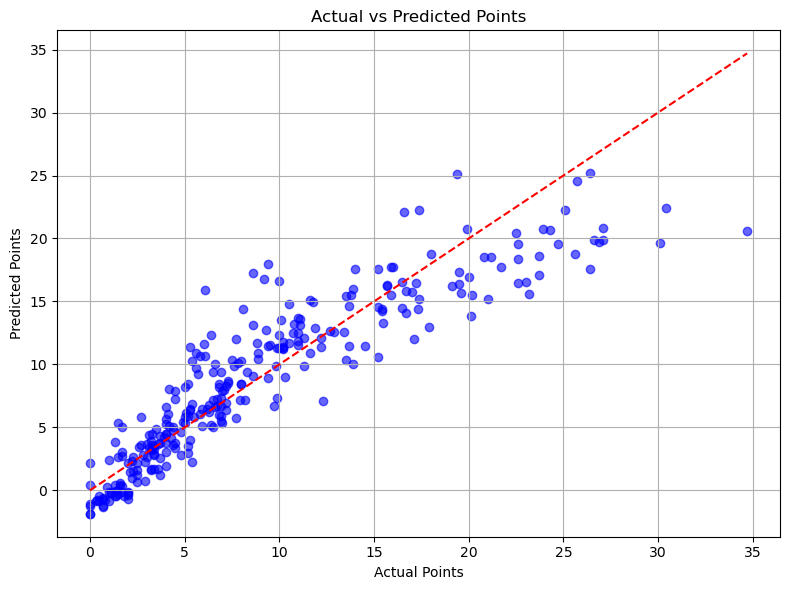

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("/Users/bcoeur34/Desktop/Python /nba_2024.csv")

# Drop rows with missing values in relevant columns
data = df[['PTS', 'AST', 'TRB', 'MP']].dropna()

# Define features and target
X = data[['AST', 'TRB', 'MP']]
y = data['PTS']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Visualize actual vs predicted points
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line y = x
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs Predicted Points')
plt.grid(True)
plt.tight_layout()
plt.show()
